# Pharmaceutical Sales Prediction

Forecasting Sales is a essential use of Machine Learning(ML).Sales forecasts can be used to identify 
benchmarks and determine incremental impacts of new initiatives, plan resources in response to expected 
demand and project future budgets.

Table of contents
 1. Exploring the data and Data Pre-processing
 2. Building models with sklearn pipelines
 3. Choose a loss function
 4. Post Prediction analysis
 5. Serialize models

# Task 1 - Exploration of customer purchasing behavior

Exploratory data analysis is the lifeblood of every meaningful machine learning project. 
It helps us unravel the nature of the data and sometimes informs how you go about modelling. 
A careful exploration of the data encapsulates checking all available features, checking their interactions 
and correlation as well as their variability with respect to the target. 


### Exploring the data and data preprocessing

## Objective 1: EDA on the given Data set

In [101]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import metrics
import category_encoders as ce
%matplotlib inline
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



import statsmodels.api as sm
import scipy.stats as stats


# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from fbprophet import Prophet

In [102]:
c = '#386B7F' # basic color for plots
plt.rcParams.update({'font.size': 20})

In [103]:
# importing the datas to the notebook
train_data = pd.read_csv('../data/train.csv',low_memory=False) #
test_data = pd.read_csv('../data/test.csv',low_memory=False)
store_data = pd.read_csv('../data/store.csv',low_memory=False)


# 1. Understanding the data¶

In [104]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [105]:
store_data.describe() # showing only the integer object description

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [106]:
train_data.describe() # showing only the integer object description

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [107]:
test_data.describe() # showing only the integer object description

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [108]:
print("Train Data shape",train_data.shape) #shows row by column value of the train dataset

Train Data shape (1017209, 9)


In [109]:
print("Test Data shape",test_data.shape) #shows row by column value of the test dataset

Test Data shape (41088, 8)


In [110]:
print("Store Data shape",store_data.shape) #shows row by column value of the store dataset

Store Data shape (1115, 10)


what unique value we have for train test and store data sets for each column

In [111]:
store_data.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [112]:
train_data.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int64

In [113]:
test_data.nunique()

Id               41088
Store              856
DayOfWeek            7
Date                48
Open                 2
Promo                2
StateHoliday         2
SchoolHoliday        2
dtype: int64

Note: from above we can see that our columns respective unique values
this will help us in identifying which value we should use for visualization

In [114]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(train_data, store_data, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [115]:
time_series_train = train_data[['Date','Sales']]

In [82]:
time_series_train.head()

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822


Lets Convert all categorical columns to object across the three datasets

In [116]:
# helper function we are going to use to convert all categorical columns to object across the given datasets
def convert_cat_cols_obj(dataset, col_lst):
    for i in col_lst: 
        dataset = dataset.astype({i:'object'})
    return dataset

In [117]:
## Converting categorical columns in train set into object
train_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
train_data = convert_cat_cols_obj(train_data, train_cols)

In [118]:
## Converting categorical columns in train set into object
test_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
test_data = convert_cat_cols_obj(test_data, test_cols)

In [119]:
## Converting categorical columns in store set into object
store_cols = ['StoreType','Assortment','CompetitionOpenSinceMonth','Promo2']
store_data = convert_cat_cols_obj(store_data, store_cols)

In [87]:
## Dealing with cardinality
train_data['StateHoliday'].replace({0:'o','0':'o'},inplace=True)
test_data['StateHoliday'].replace({'0':'o'},inplace=True)

# 2. Cleaning the data

In [120]:
def convert_cat_date_datetime(dataset, col_name):
    dataset[col_name] = pd.to_datetime[dataset[col_name]]
    return dataset

In [121]:
train_data['Date'] = pd.to_datetime(train_data.Date)

In [122]:
train_data.index = train_data['Date']

In [123]:
# data extraction
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Day'] = train_data.index.day
train_data['WeekOfYear'] = train_data.index.weekofyear

# adding new variable
train_data['SalePerCustomer'] = train_data['Sales']/train_data['Customers']
train_data['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [124]:
# closed stores
train_data[(train_data.Open == 0) & (train_data.Sales == 0)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,
2015-07-31,292,5,2015-07-31,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-31,876,5,2015-07-31,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-30,292,4,2015-07-30,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-30,876,4,2015-07-30,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-29,292,3,2015-07-29,0,0,0,1,0,1,2015,7,29,31,NaN


In [125]:
# opened stores with zero sales
zero_sales = train_data[(train_data.Open != 0) & (train_data.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 14)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,
2015-05-15,971,5,2015-05-15,0,0,1,0,0,1,2015,5,15,20,NaN
2015-03-26,674,4,2015-03-26,0,0,1,0,0,0,2015,3,26,13,NaN
2015-02-05,699,4,2015-02-05,0,0,1,1,0,0,2015,2,5,6,NaN
2014-10-01,708,3,2014-10-01,0,0,1,1,0,0,2014,10,1,40,NaN
2014-09-22,357,1,2014-09-22,0,0,1,0,0,0,2014,9,22,39,NaN


In [126]:
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")
train_data = train_data[(train_data["Open"] != 0) & (train_data['Sales'] != 0)]

print("In total: ", train_data.shape)

Closed stores and days which didn't have any sales won't be counted into the forecasts.
In total:  (844338, 14)


In [127]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

few variables with missing values that we need to deal with. Let's start with the CompetitionDistance.

In [128]:
# missing values in CompetitionDistance
store_data[pd.isnull(store_data.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Note: Apperently this information is simply missing from the data. No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values(which is twice less that the average).

In [129]:
# fill NaN with a median value (skewed distribuion)
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

If there's no Promo2 then there's no information about it. We can replace these values by zeros. The same goes for tha variables deducted from the competition, CompetitionOpenSinceMonth and CompetitionOpenSinceYear

In [130]:
# replace NA's by 0
store_data.fillna(0, inplace = True)

In [131]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(train_data, store_data, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (844338, 23)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [132]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


StoreType B has the highest average of Sales among all others, however we have much less data for it. So let's print an overall sum of Sales and Customers to see which StoreType is the most selling and crowded one:

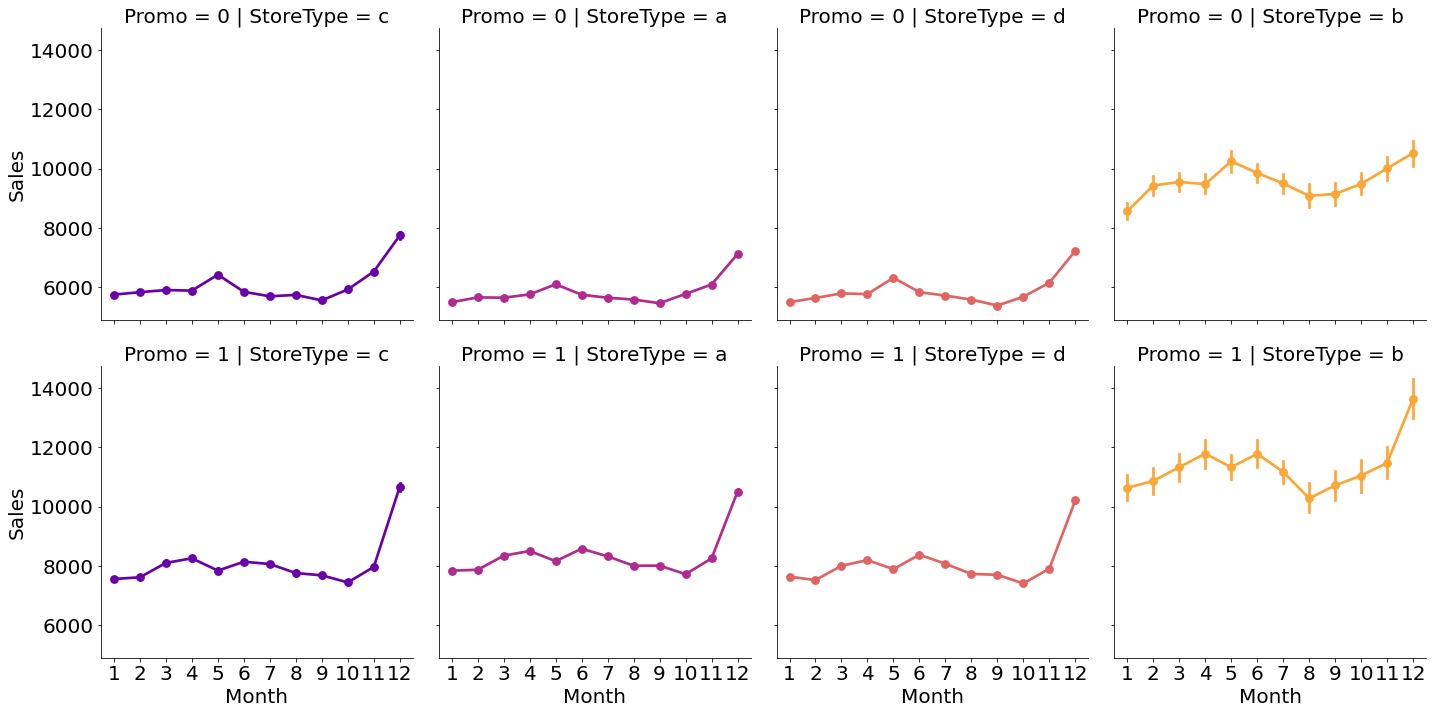

In [133]:
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c, fontsize=24)

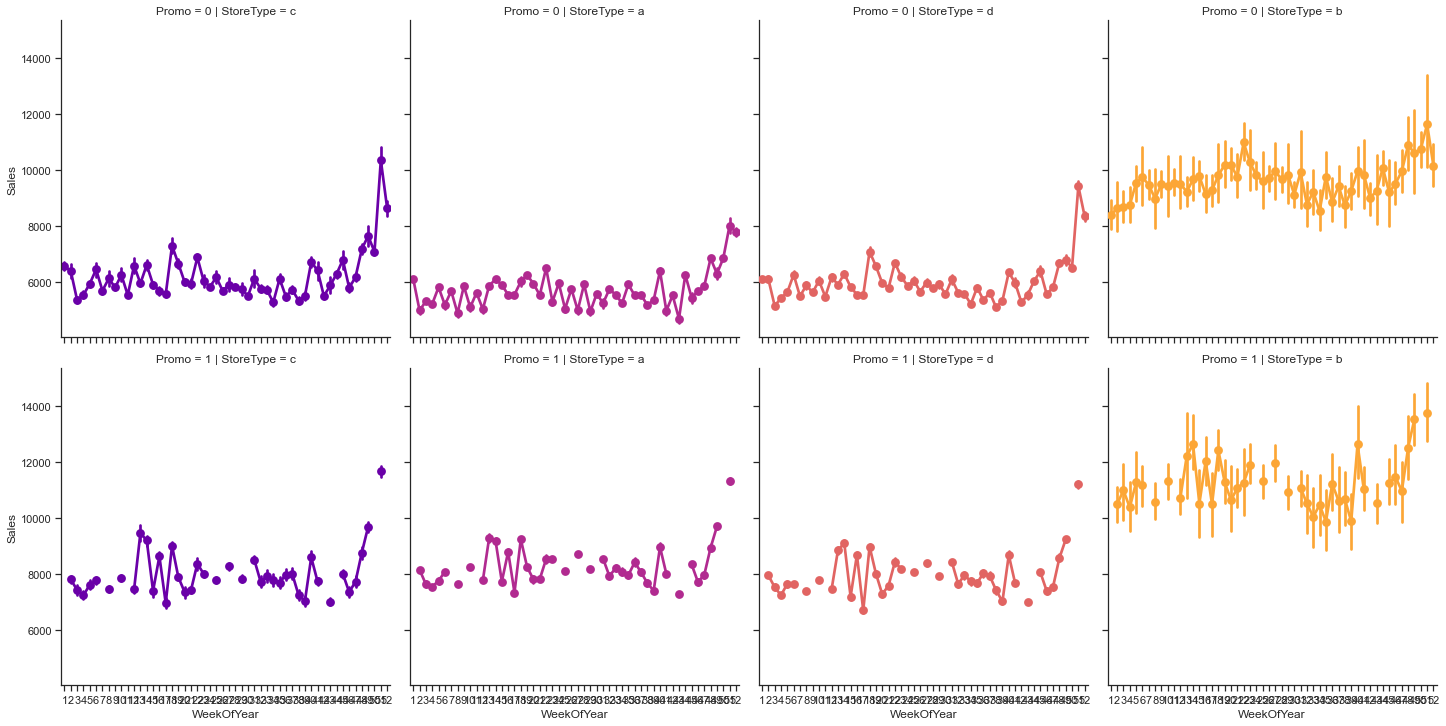

In [400]:
# sales trends
sns.factorplot(data = train_store, x = 'WeekOfYear', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c, fontsize=24) 

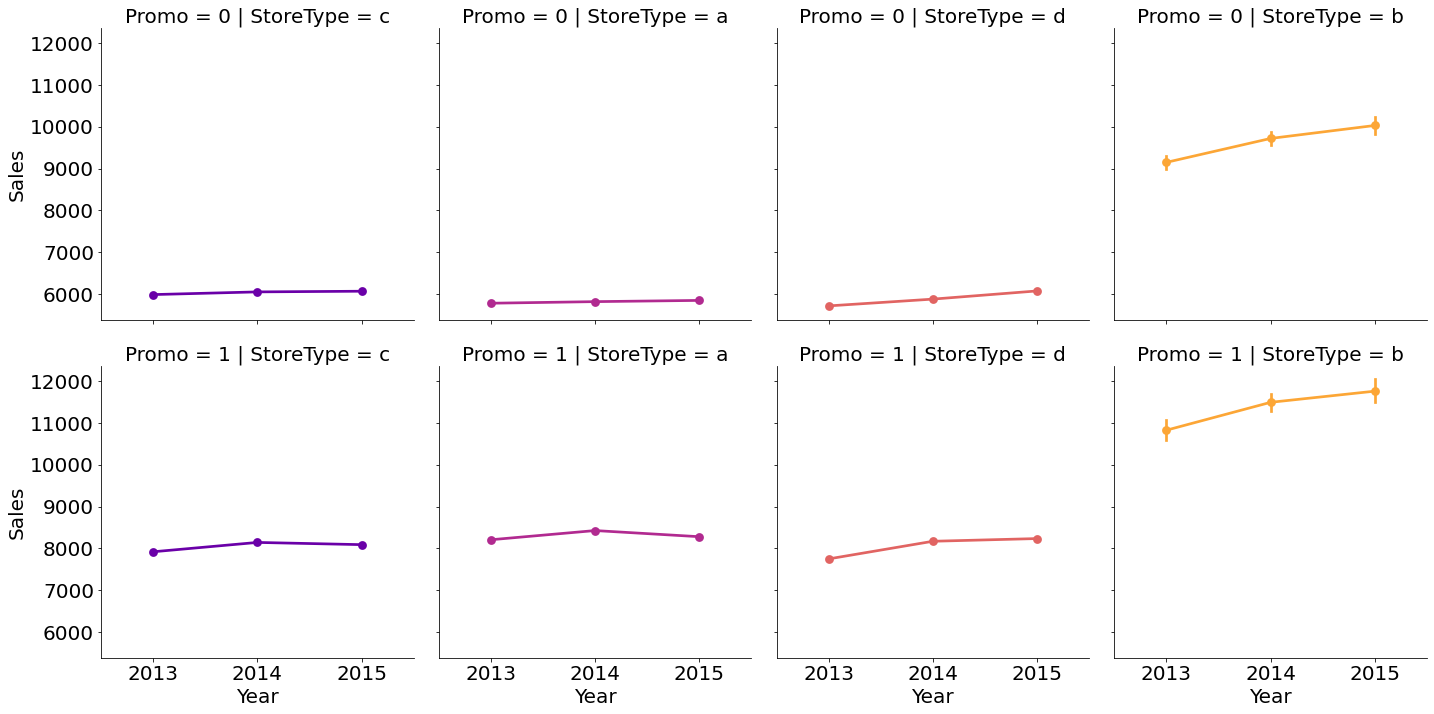

In [134]:
# sales trends
sns.factorplot(data = train_store, x = 'Year', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c, fontsize=24) 

In [135]:
train_data.isnull().sum()

Store              0
DayOfWeek          0
Date               0
Sales              0
Customers          0
Open               0
Promo              0
StateHoliday       0
SchoolHoliday      0
Year               0
Month              0
Day                0
WeekOfYear         0
SalePerCustomer    0
dtype: int64

In [136]:
test_data['Open']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
41083    1.0
41084    1.0
41085    1.0
41086    1.0
41087    1.0
Name: Open, Length: 41088, dtype: object

from the above we can have more than 30% null value in respective columns in store data
from this we can decide what we should do with the null values

# 3. Detecting an outliers

An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean.
We Use scipy.stats.zscore() to remove outliers from a DataFrame

In [137]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,
2015-07-31,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,8.626118


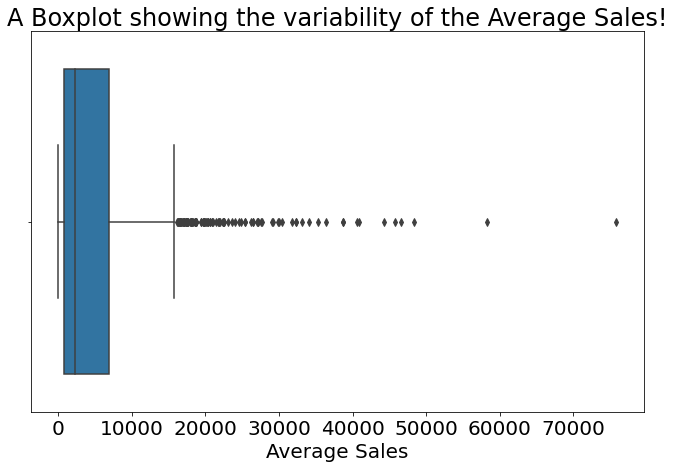

In [138]:
plt.figure(figsize=(11,7))
sns.boxplot(x=store_data['CompetitionDistance'])
plt.title('A Boxplot showing the variability of the Average Sales!')
plt.xlabel('Average Sales')
plt.show()

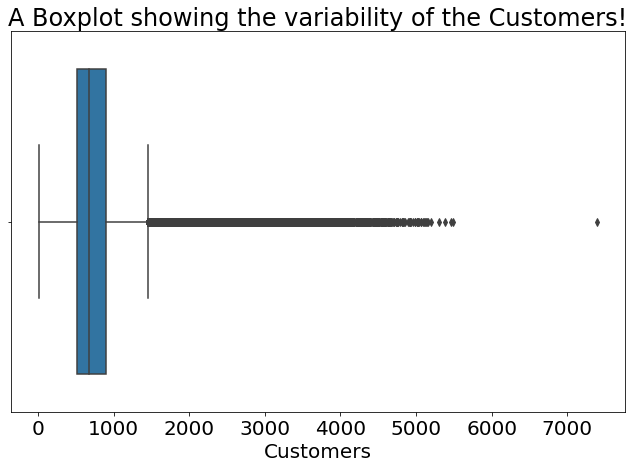

In [139]:
plt.figure(figsize=(11,7))
sns.boxplot(x=train_data['Customers'])
plt.title('A Boxplot showing the variability of the Customers!')
plt.xlabel('Customers')
plt.show()

#### Outlier Treatment 

**Get the Z-score table.**

In [140]:
from scipy import stats 
z_sales=np.abs(stats.zscore(train_data.Sales))
z_sales

array([0.54544483, 0.28737522, 0.43753943, ..., 0.61890285, 0.7941711 ,
       0.3205602 ])

In [141]:
#cutomer outlier
z_cust=np.abs(stats.zscore(train_data.Customers))
z_cust

array([0.5178971 , 0.34341789, 0.14512392, ..., 1.20944714, 0.68850205,
       1.6007791 ])

We find the z-score for each of the data point in the dataset and if the z-score is greater than 3 than we can classify that point as an outlier. Any point outside of 3 standard deviations would be an outlier

In [142]:
threshold=3
print(np.where(z_cust>3))

(array([   124,    250,    258, ..., 844319, 844323, 844334]),)


 *remove the outlier* 

In [143]:
train_data=train_data[(z_cust< 3)]
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,
2015-07-31,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,8.626118


In [144]:
train_data.shape

(828819, 14)

In [145]:
### Interquartile Range Method Sales Column
Q1=store_data['CompetitionOpenSinceYear'].quantile(0.25)
Q3=store_data['CompetitionOpenSinceYear'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
2011.0
2011.0
-3016.5 5027.5


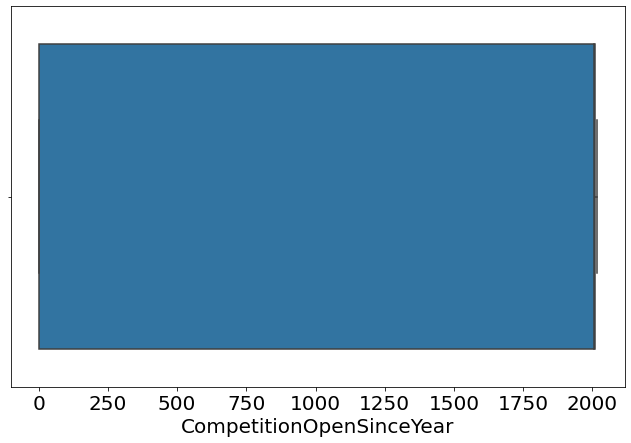

In [50]:
#removing the outliers and plotting again
plt.figure(figsize=(11,7))
store_data = store_data[store_data['CompetitionOpenSinceYear'] <Upper_Whisker]
sns.boxplot(x=store_data['CompetitionOpenSinceYear'])
plt.show()

In [146]:
### Interquartile Range Method Sales Column
Q1=train_data['Sales'].quantile(0.25)
Q3=train_data['Sales'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

4831.0
8219.0
3388.0
-251.0 13301.0


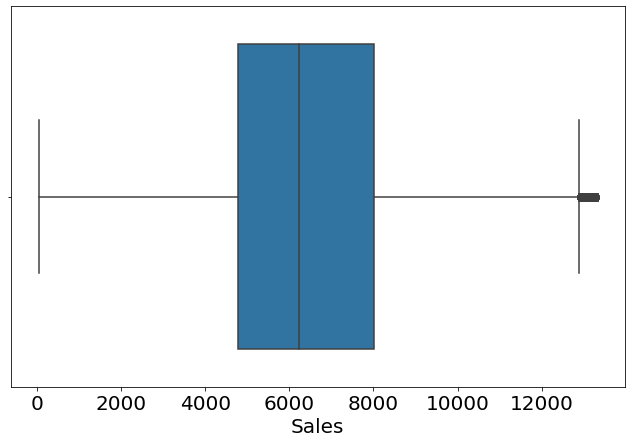

In [52]:
#removing the outliers and plotting again
plt.figure(figsize=(11,7))
train_data = train_data[train_data['Sales'] < Upper_Whisker]
sns.boxplot(x=train_data['Sales'])
plt.show()

Closed stores and zero sales stores

In [147]:
len(train_data[(train_data.Open == 0) & (train_data.Sales == 0)])

0

In [148]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# 4. Relationshiop analysis

In [149]:
#correlation matrix
correlation = train_data.corr()

<AxesSubplot:>

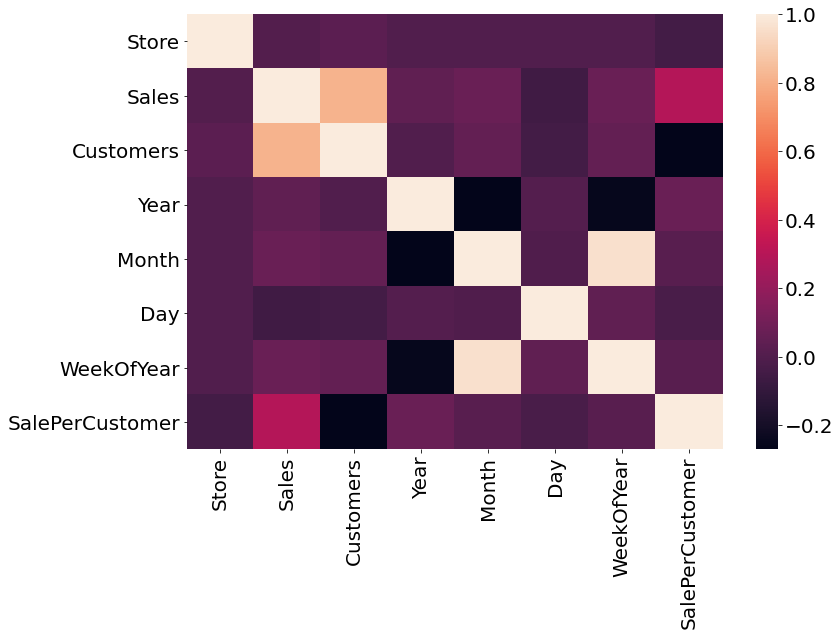

In [150]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation)

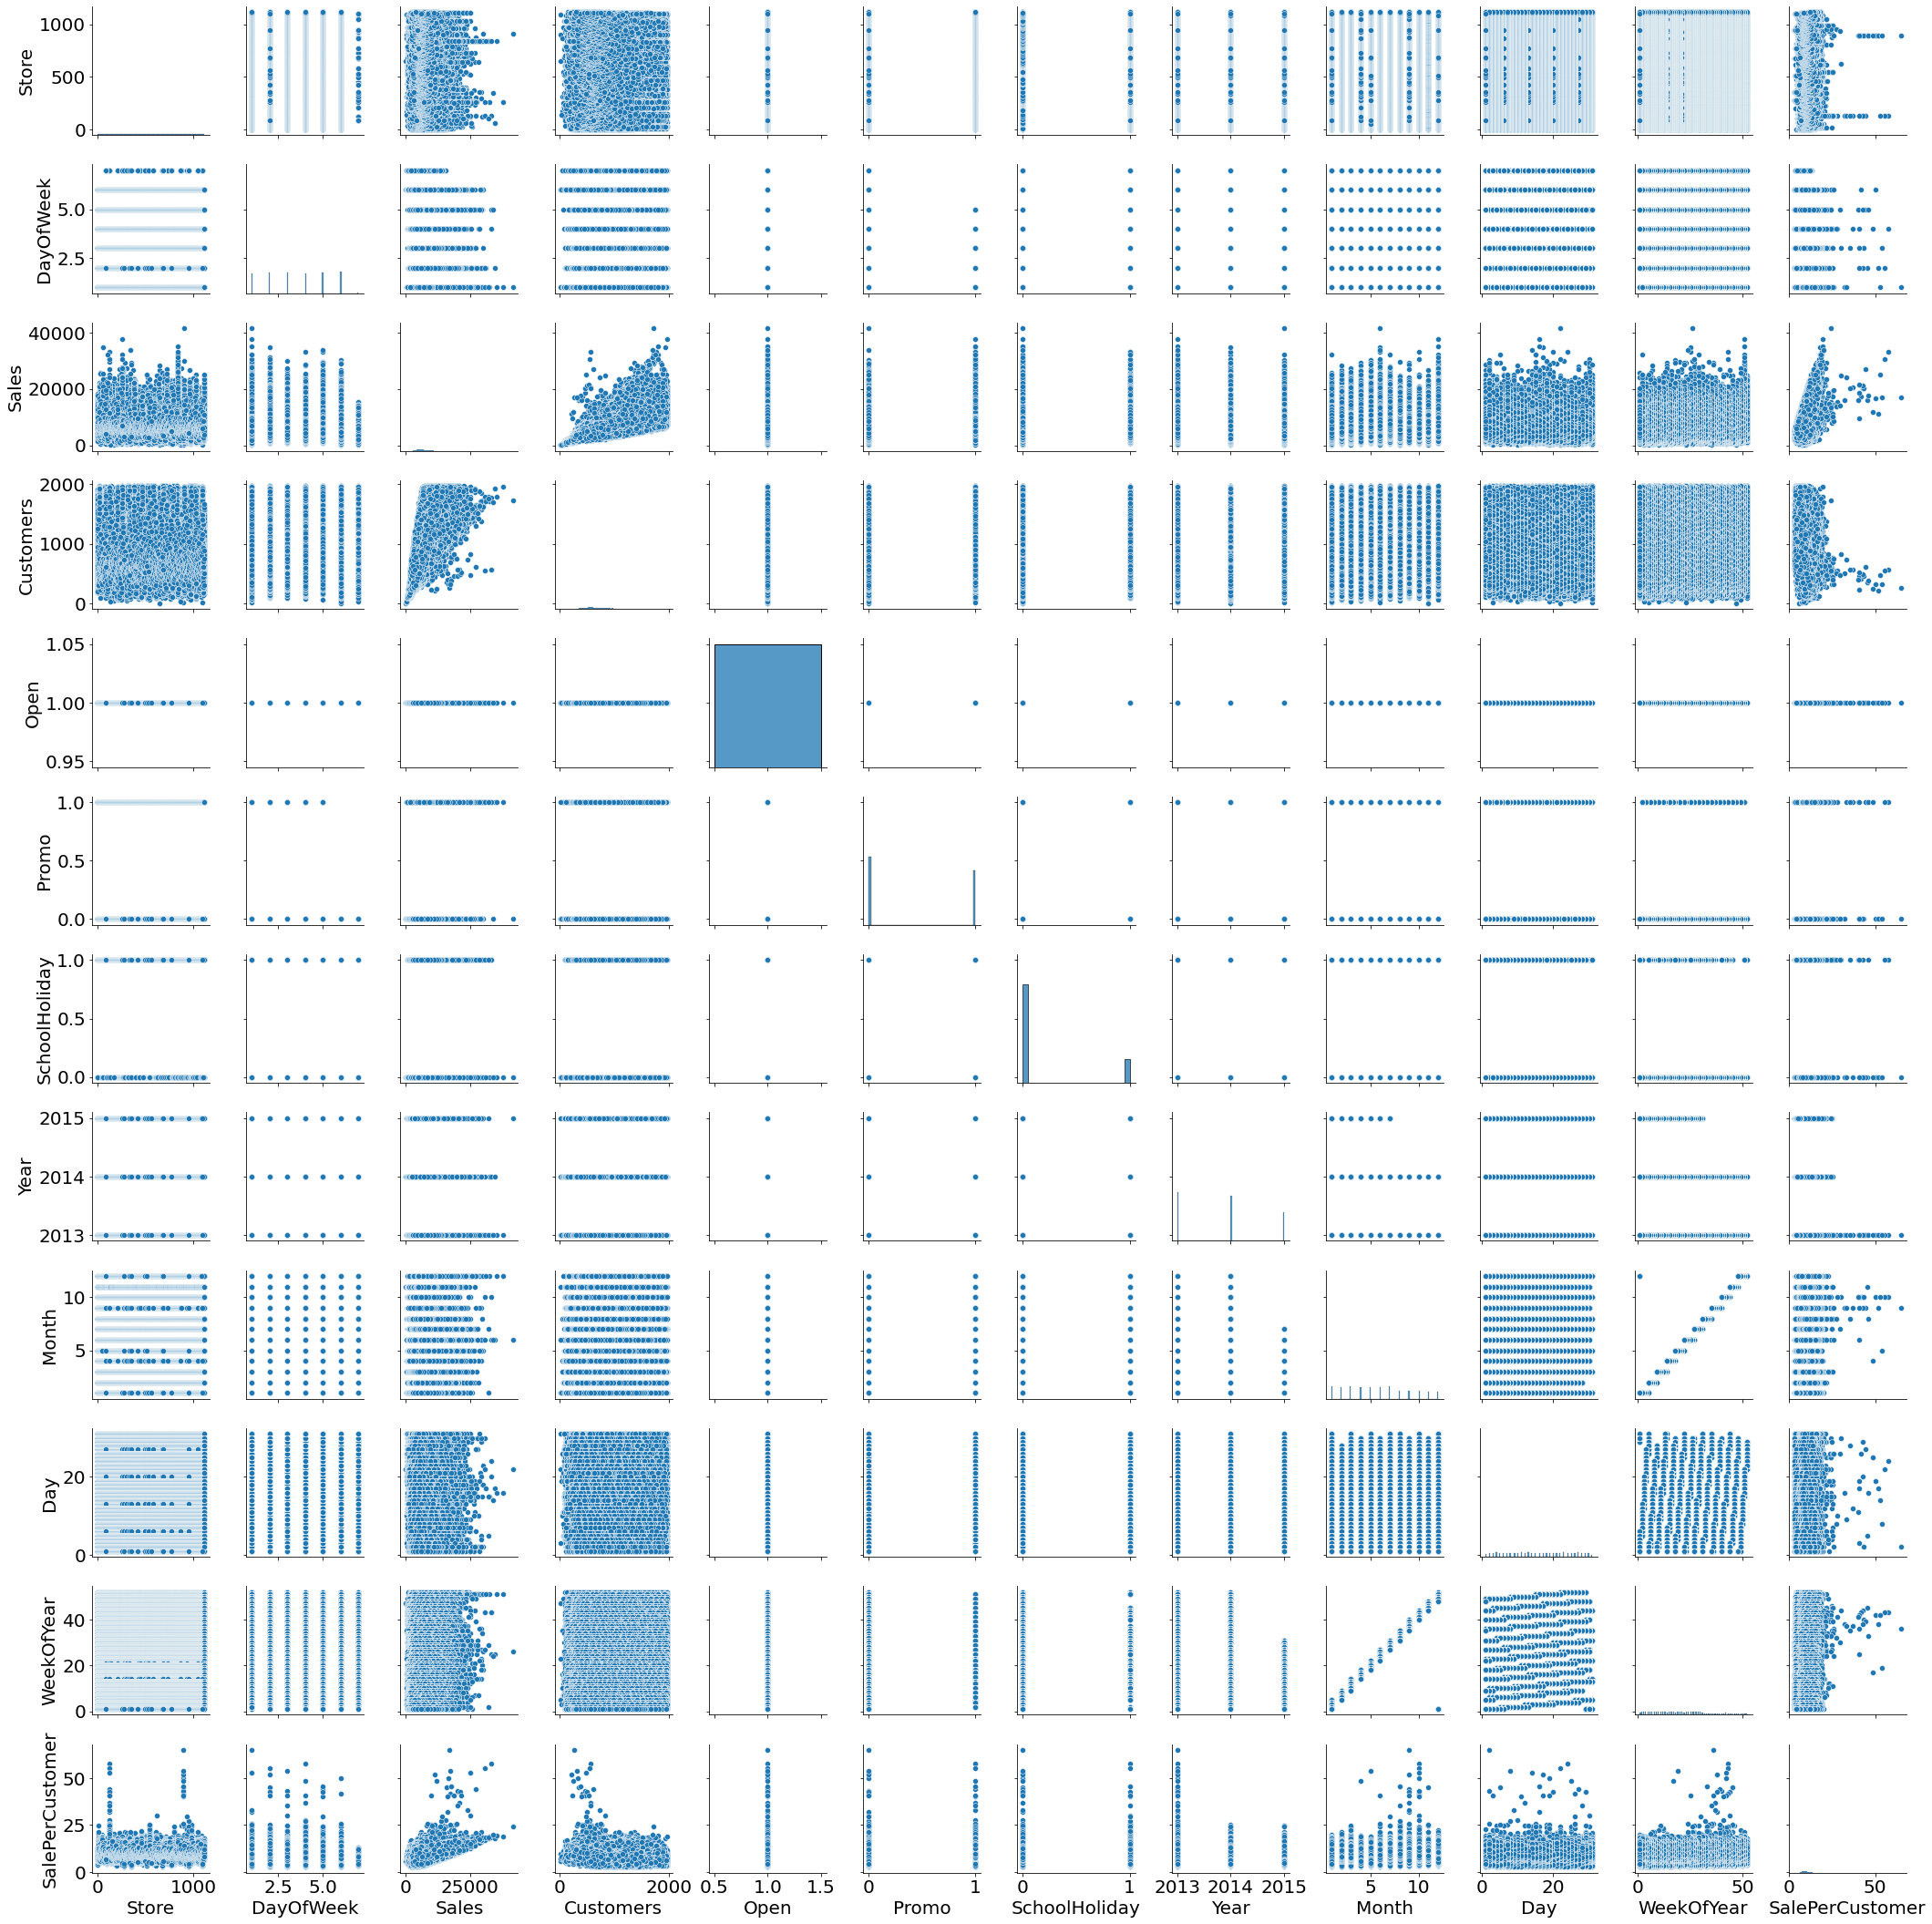

In [151]:
sns.pairplot(train_data)

<Figure size 864x576 with 0 Axes>

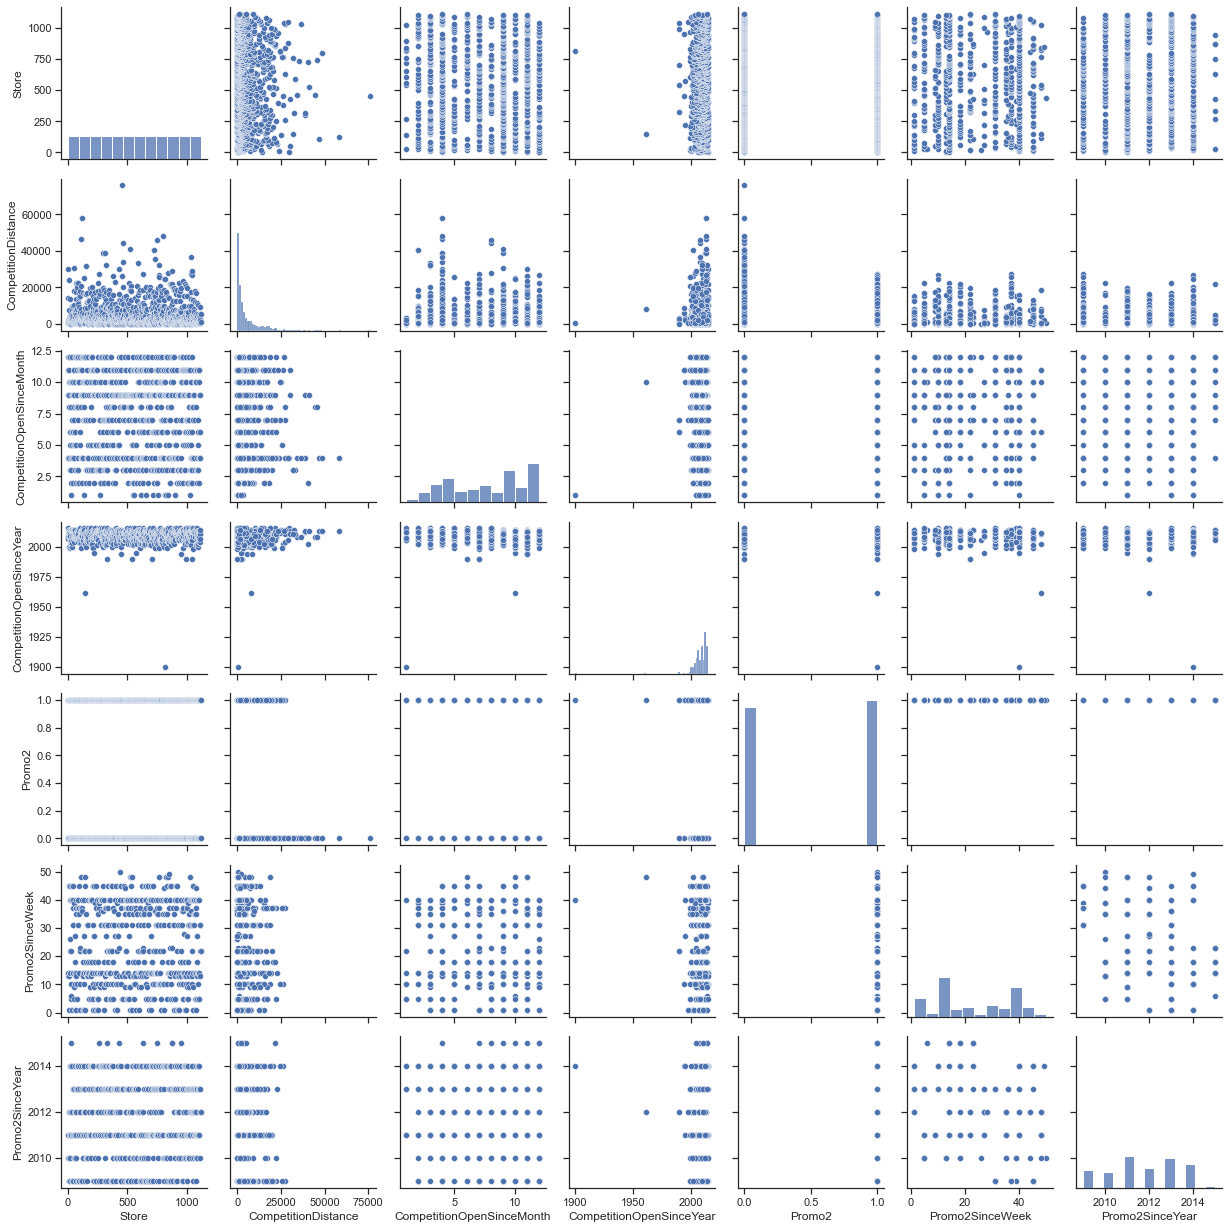

In [430]:
sns.pairplot(store_data)

In [152]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,
2015-07-31,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,8.626118


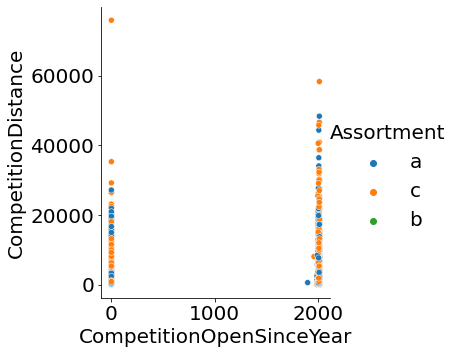

In [153]:
sns.relplot( x="CompetitionOpenSinceYear",y='CompetitionDistance', hue='Assortment', data=store_data)

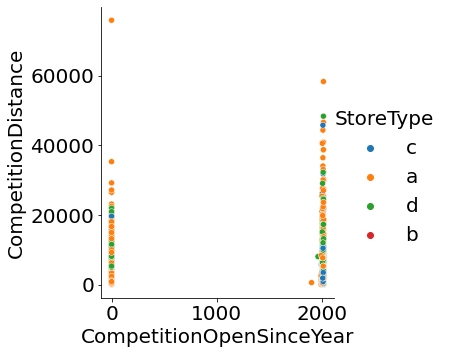

In [154]:
sns.relplot( x="CompetitionOpenSinceYear",y='CompetitionDistance', hue='StoreType', data=store_data)

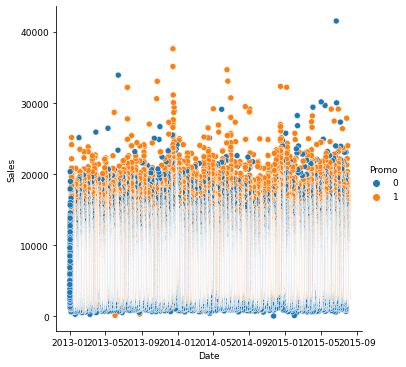

In [155]:
plt.rcParams.update({'font.size': 9})
sns.relplot( x="Date",y='Sales', hue='Promo', data=train_data)

Note: as we see from above graph the sales are high

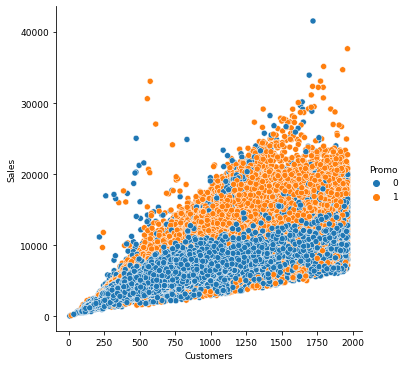

In [156]:
sns.relplot( x="Customers",y='Sales', hue='Promo', data=train_data)


# 1. Check for seasonality in both training and test sets - are the seasons similar between these two groups?

## 1.1 seasonality check series for Training dataset

In [157]:
time_series_train = train_data[['Date','Sales']]

In [158]:
time_series_train.head()

,Date,Sales
Date,,
2015-07-31,2015-07-31,5263
2015-07-31,2015-07-31,6064
2015-07-31,2015-07-31,8314
2015-07-31,2015-07-31,13995
2015-07-31,2015-07-31,4822


In [159]:
time_series_train['datetime'] = pd.to_datetime(time_series_train['Date'])
time_series_train = time_series_train.set_index('datetime')
time_series_train.drop(['Date'], axis=1, inplace=True)
time_series_train.head()

,Sales
datetime,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


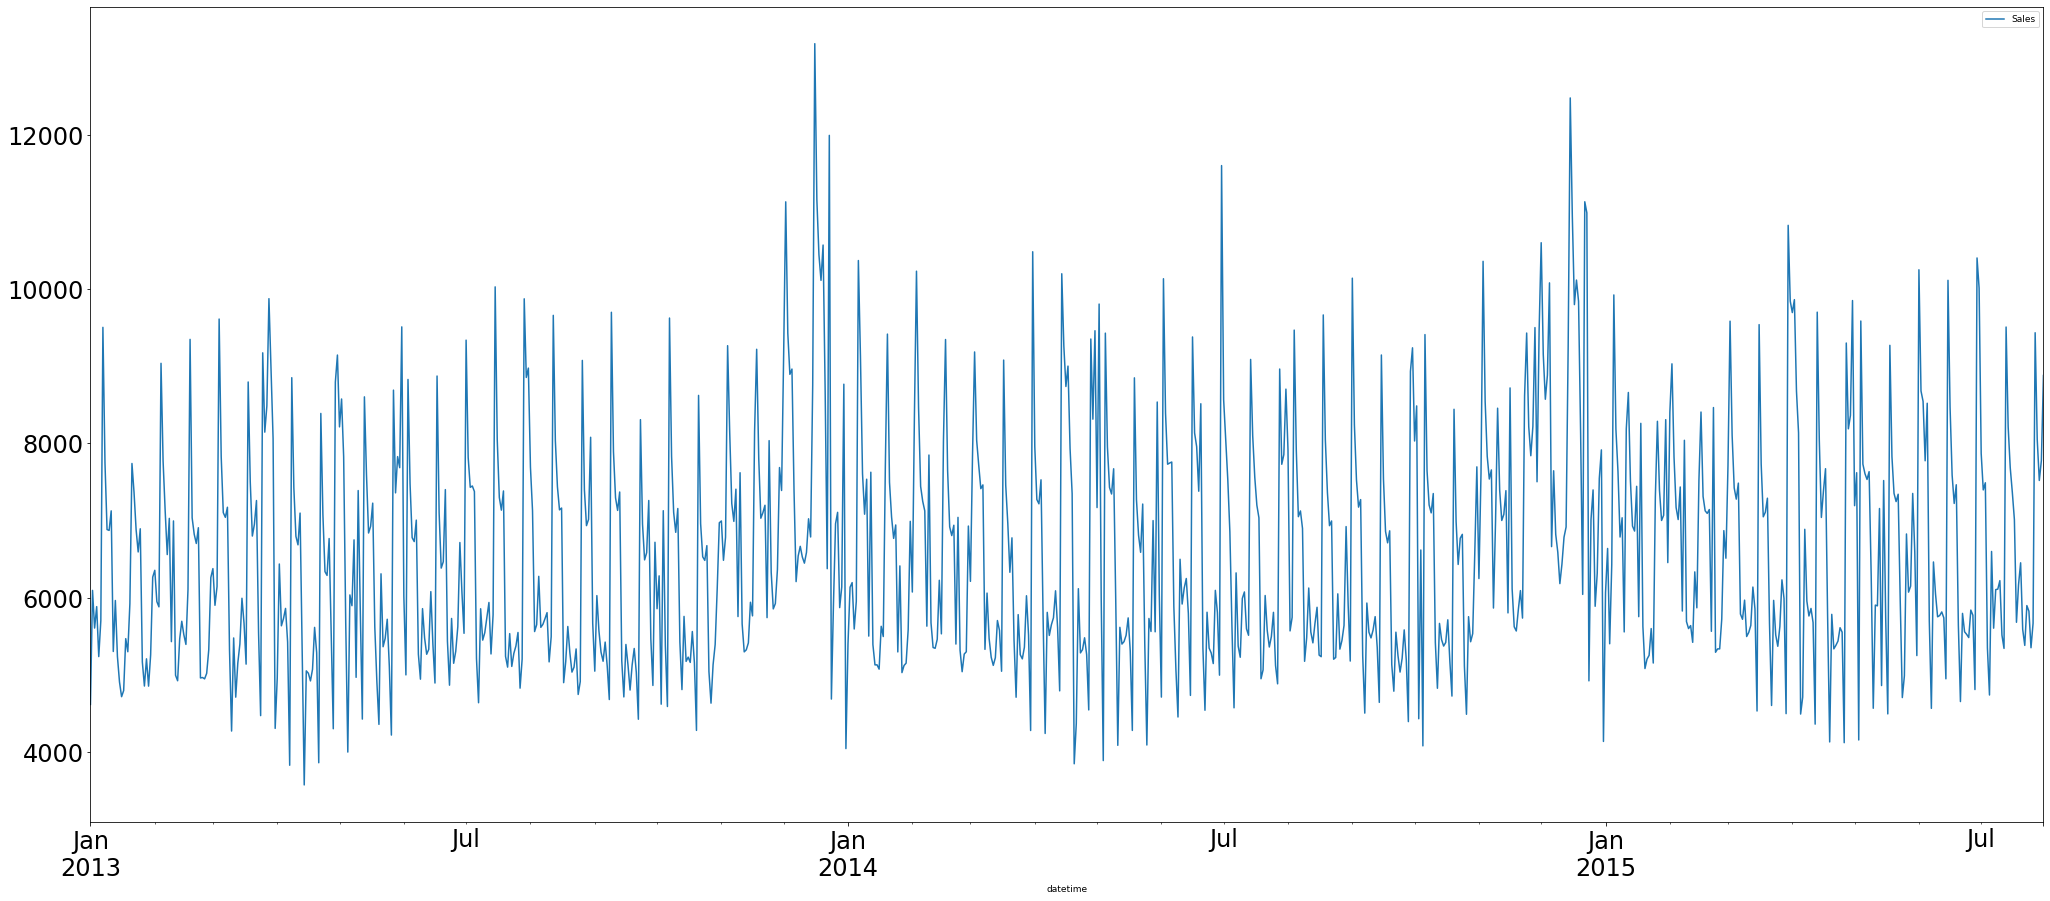

In [160]:
time_series_train_day = time_series_train.resample('D').mean()
time_series_train_day.plot(figsize=(35,15), fontsize=24)
plt.show()

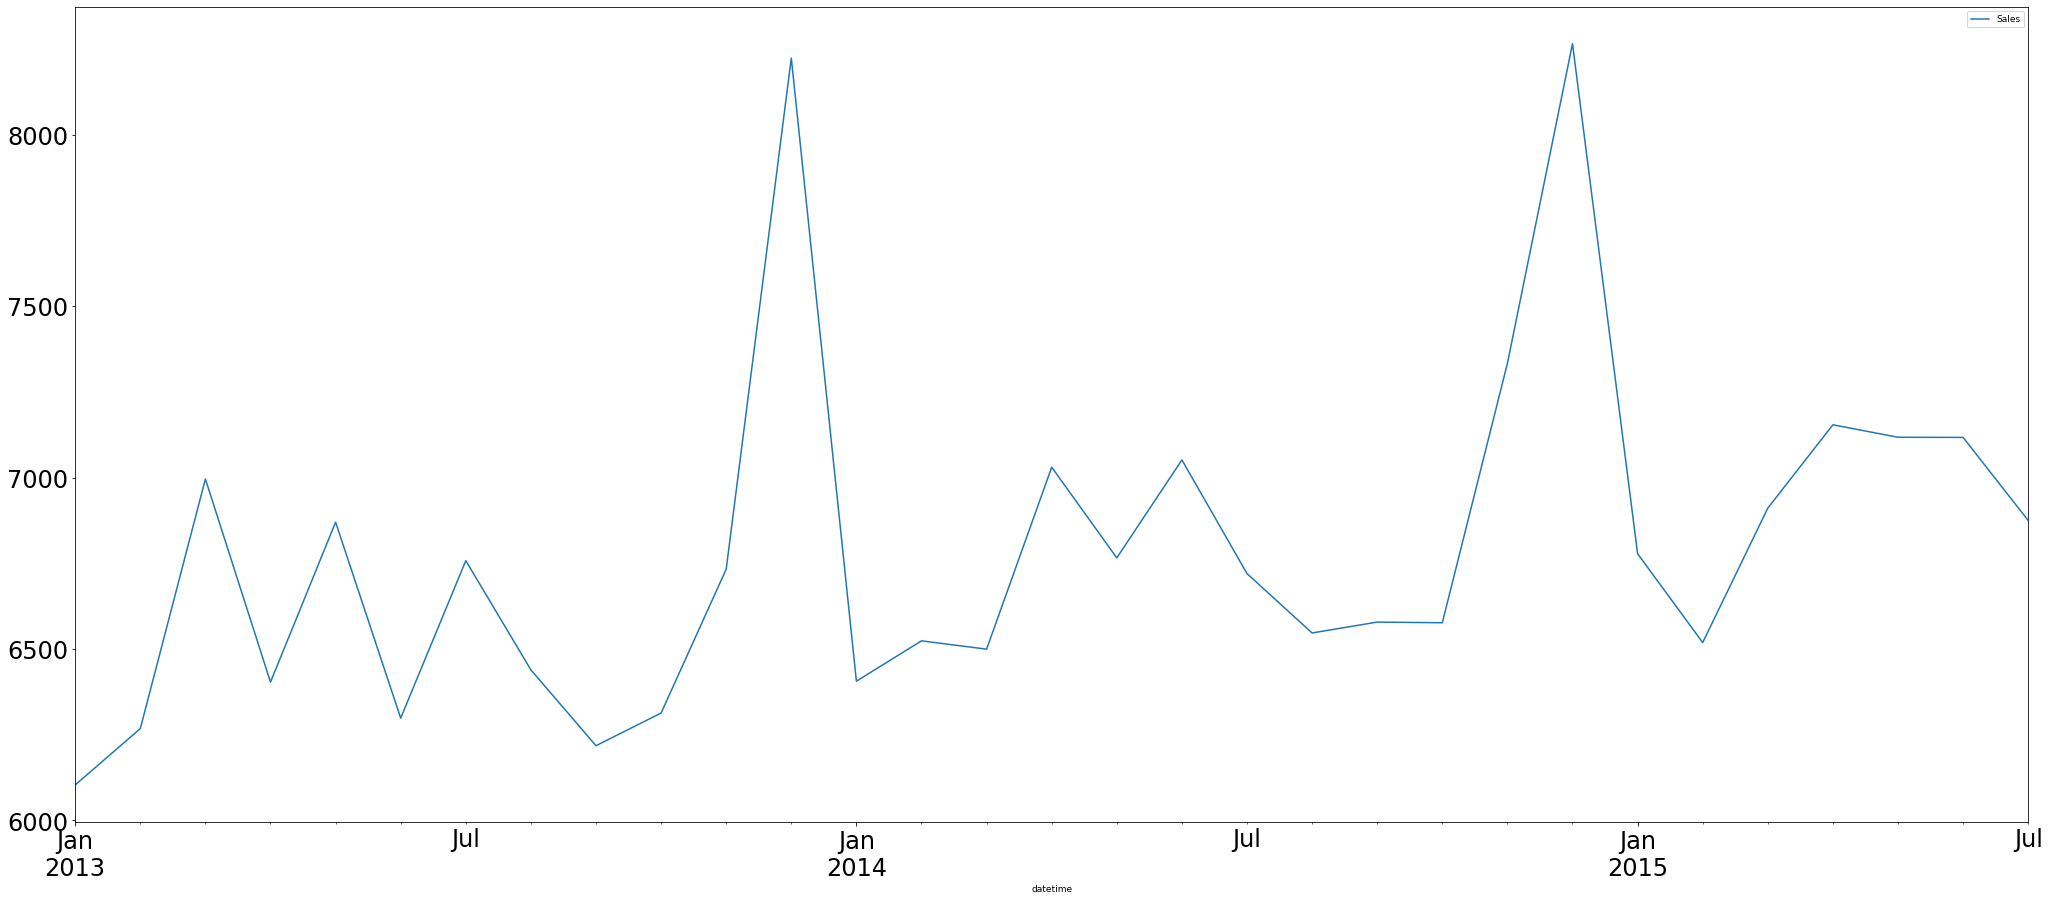

In [161]:
time_series_train_month = time_series_train.resample('M').mean()
time_series_train_month.plot(figsize=(35,15), fontsize=24)
plt.show()

### 1.2 seasonality check of data series for test dataset

In [162]:
# time_series_test = test_data[['Date','Sales']]
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


from three graphs above we can see that the sales is peak on december 2013 and december 2014, for the reason that holidays are on december but as data scietist lets make it reasonable and data driven

# 2. Check & compare sales behavior before, during and after holidays

In [163]:
#lets extract the dataset for Chrismas holiday from train_data
chrismas_data = train_data[train_data['StateHoliday'] == "c"]
chrismas_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,,
2014-12-26,85,5,2014-12-26,9741,1161,1,0,c,1,2014,12,26,52,8.390181
2014-12-26,274,5,2014-12-26,7818,1412,1,0,c,1,2014,12,26,52,5.536827
2014-12-26,299,5,2014-12-26,1800,190,1,0,c,1,2014,12,26,52,9.473684
2014-12-26,335,5,2014-12-26,5784,961,1,0,c,1,2014,12,26,52,6.018730
2014-12-26,353,5,2014-12-26,8057,1533,1,0,c,1,2014,12,26,52,5.255708


In [164]:
christmas_data = train_store[(train_store['Month'] == 12) |(train_store['Month'] == 1)]

christmas_data.shape

(136728, 23)

<Figure size 864x576 with 0 Axes>

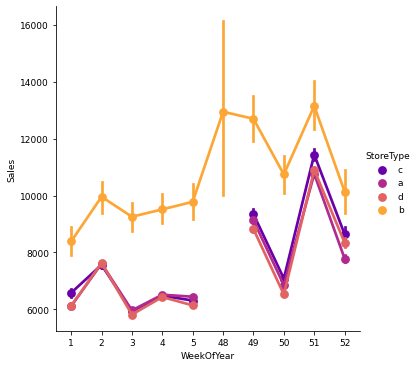

In [165]:
# sales trends
plt.figure(figsize=(12,8))
ax = sns.factorplot(data = christmas_data, x = 'WeekOfYear', y = "Sales", 
                # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
                # per promo in the store in rows
               color = c,fontsize=24)

Note: the week before the holiday has high sales and weeks during and after the holiday are very low and we also can see that the sales for each store type is global minimum at first week as wee see it! and it starts decreasing from week 51 and during the chrismas as wee se it is really low as we can see on the above graph

## 3. What can you say about the correlation between sales and number of customers?

In [166]:
data_corr = train_store[['Store','Sales','Customers',]]

<AxesSubplot:>

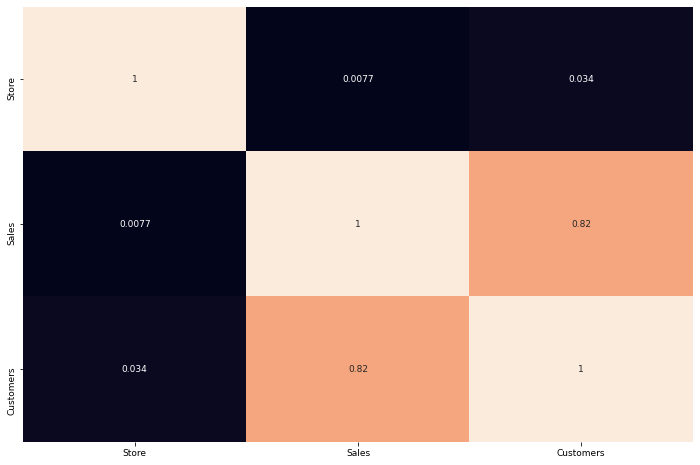

In [167]:
#correlation matrix
plt.figure(figsize=(12,8))
correlation = data_corr.corr()
sns.heatmap(correlation,annot = True,  cbar=False)

**Note:** as we can see from the above figure there is strong correlation between sales and number of customer whith correllation of 0.89

## 4.  How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [168]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [169]:
promo_sales = train_store[['Store','Promo','Promo2','Sales',"Customers"]]
promo_sales.head()

,Store,Promo,Promo2,Sales,Customers
0,1,1,0,5263,555
1,1,1,0,5020,546
2,1,1,0,4782,523
3,1,1,0,5011,560
4,1,1,0,6102,612


In [170]:
promo_sales[promo_sales['Promo'] ==1].Customers.sum()

318263940

In [171]:
promo_sales_grouped = promo_sales.groupby(["Promo"])[['Sales','Customers']].sum()
promo_sales_grouped

,Sales,Customers
Promo,,
0,2771974337,325777807
1,3101206286,318263940


In [172]:
sales0 = promo_sales_grouped.iloc[0,0]
sales1 = promo_sales_grouped.iloc[1,0]
cust0 = promo_sales_grouped.iloc[0,1]
cust1 = promo_sales_grouped.iloc[1,1]

In [173]:
percentage_change_sales = ((sales1 - sales0)/sales0) * 100
percentage_change_cust = ((cust1-cust0)/cust0) *100
print("Percentage increase in Sales is " + str(percentage_change_sales) + "%")
print("Percentage increase in Customer is " + str(percentage_change_cust) + "%")


Percentage increase in Sales is 11.877164395263302%
Percentage increase in Customer is -2.306439186018586%


Text(0.5, 1.0, 'Promo vs Sales')

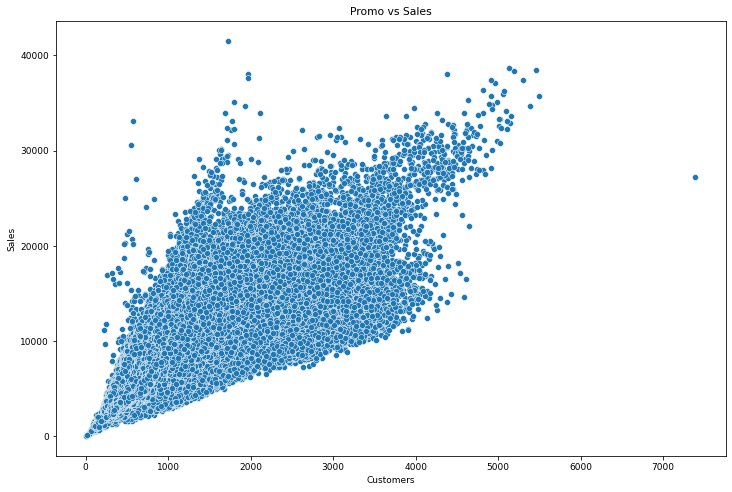

In [97]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Customers', y="Sales",data=promo_sales )
ax.set_title('Promo vs Sales')

Text(0.5, 1.0, 'Promo vs Sales')

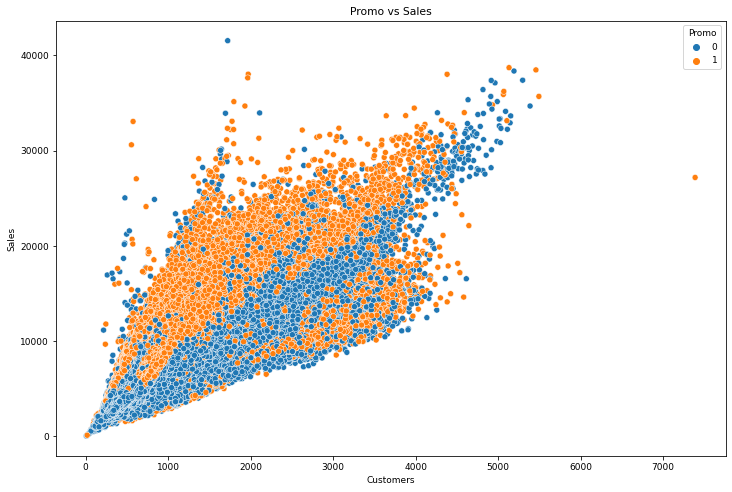

In [174]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Customers', y="Sales",hue="Promo",data=promo_sales )
ax.set_title('Promo vs Sales')

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

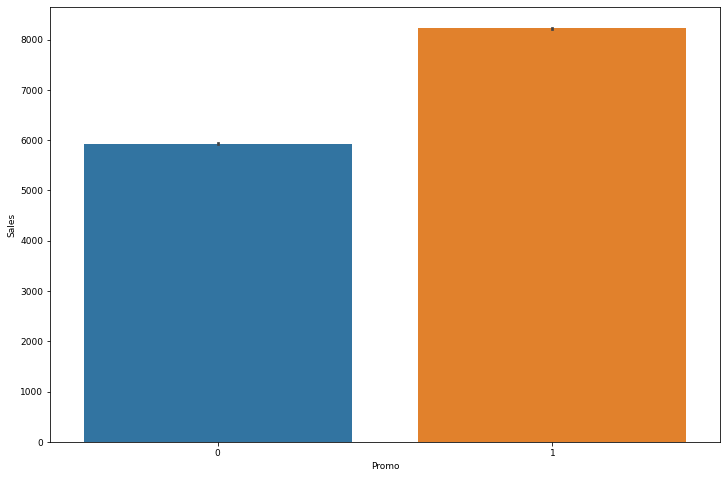

In [175]:
plt.figure(figsize=(12,8))
sns.barplot(x='Promo', y="Sales", data=promo_sales )

**Note:** there is 11.877% increase during promotion on sales and therefore Promo while there is decress of 2.3% in customer 

# 3.Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


In [176]:
promos_store = train_store[['Store','StoreType','Promo','Sales','Customers']]

In [177]:
promos_store = promos_store.groupby(['StoreType',"Promo"]).\
                agg({'Store':"count","Sales":"sum","Customers":"sum"})
promos_store

Store       Sales  Customers
StoreType Promo                               
a         0      252532  1466971549  180276608
          1      204510  1698363310  183264823
b         0        9622    92061910   18685985
          1        5938    67169485   12779631
c         0       62235   375186657   47222206
          1       50733   408034769   44907499
d         0      143074   837754221   79593008
          1      115694   927638722   77311987

**Note:** as we can see from above table if we deploy promo in StoreType a we can both attract more customer and there is a huge increase in Sales relative to the other stores

# 4. Trends of customer behavior during store open and closing times


since we have cleaned our data before lets bring the data again to see the customer behaviour during the store is open or closed

In [178]:
#bringing in the data again for this question sake
train_before_cleaning = pd.read_csv('../data/train.csv')
train_before_cleaning.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [179]:
train_before_cleaning[train_before_cleaning['Open'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [180]:
data_open_state = train_before_cleaning[['Open','Customers']]
data_open_state = data_open_state.groupby(['Open']).agg({"Customers":'sum'})
data_open_state

,Customers
Open,
0,0
1,644041755


<AxesSubplot:xlabel='Open', ylabel='Customers'>

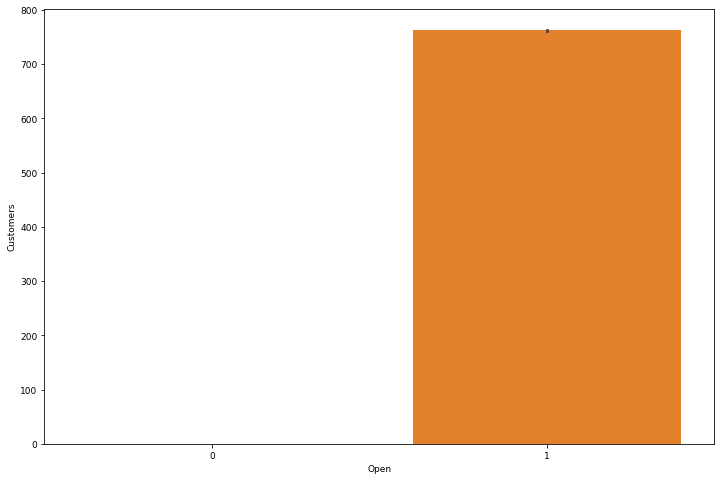

In [181]:
plt.figure(figsize=(12,8))
sns.barplot(x="Open",y='Customers', data=train_before_cleaning)

**Note:** from this the trends as expected when the Pharmaceutical is closed there is no customer, All the customer interacts with the pharmaceutical when it is opened

# 5. Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [182]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [183]:
weekday_data = train_store[['Open', "DayOfWeek","StoreType",'Sales']]

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

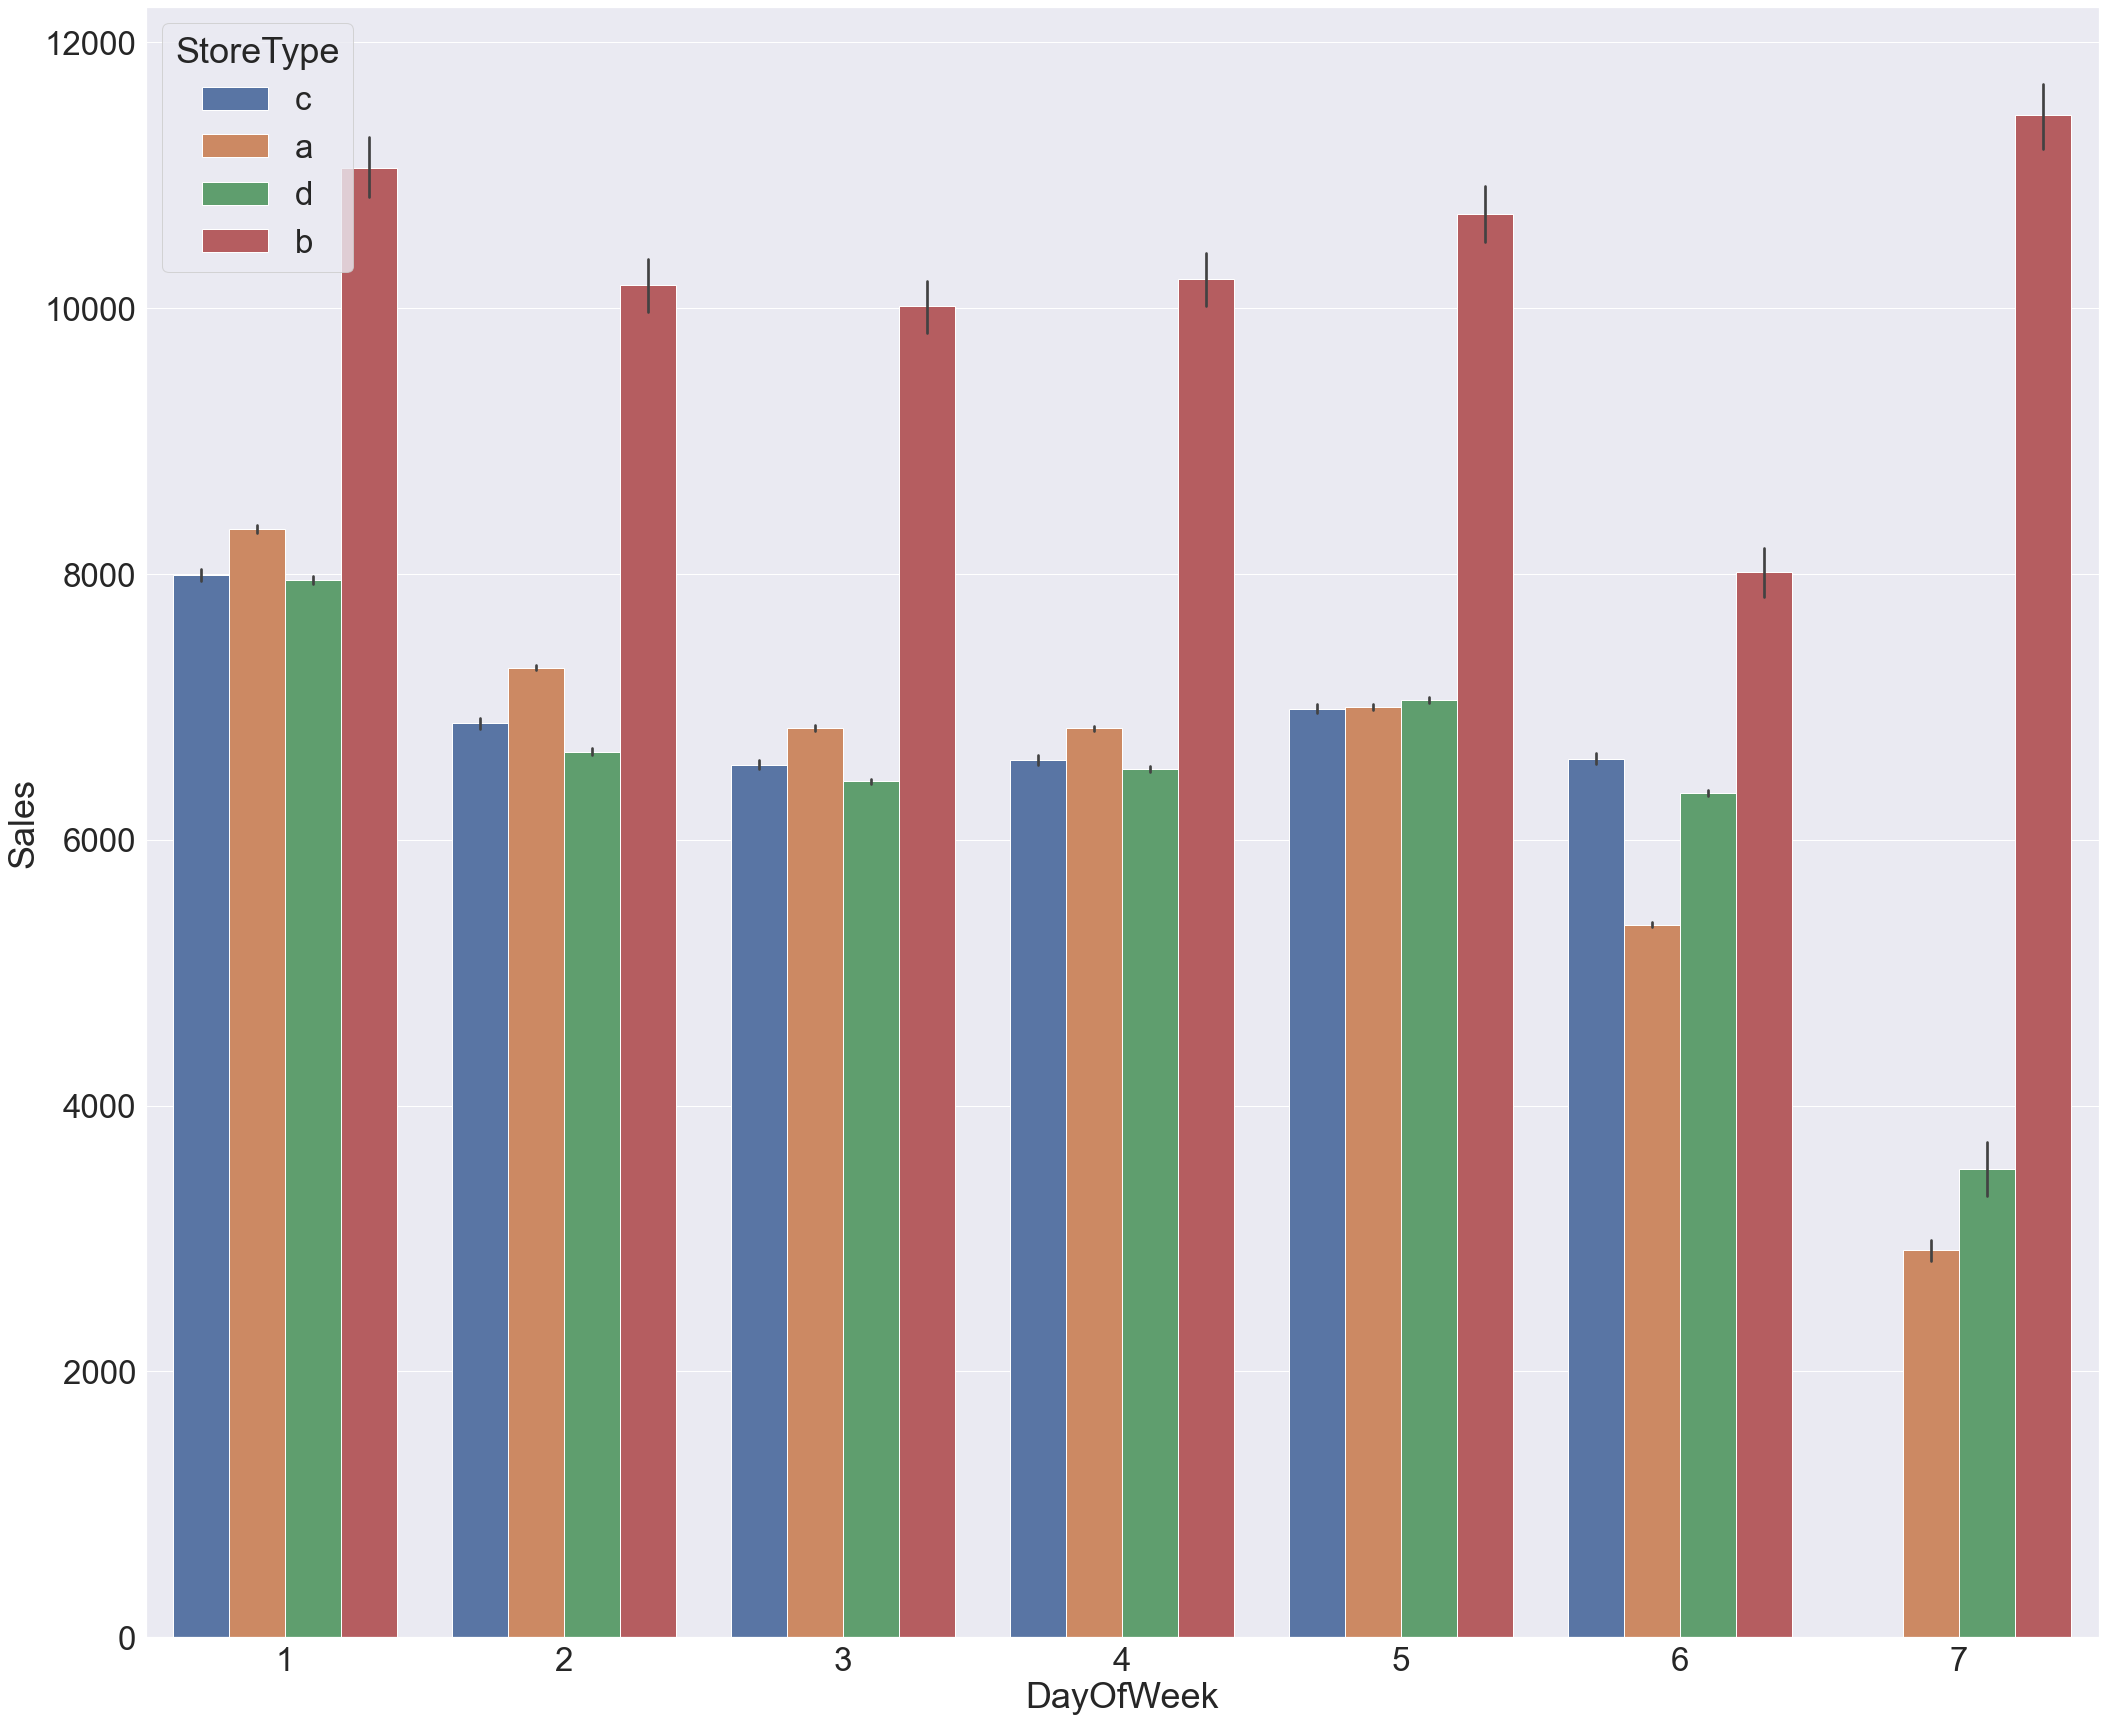

In [184]:
sns.set(font_scale=3)  
plt.figure(figsize=(35,30))
sns.barplot(x="DayOfWeek", y="Sales", hue="StoreType", data=weekday_data)

**Note:** from above figure we can see that all Store Types are working all weekdays except Store Type c. and the effect as seen on the 7th day from the figure above the Store Type c is kind have kind of low overall sales as **shown in the figure below**

In [185]:
weekday_data1 = train_store.groupby(['StoreType']).agg({"DayOfWeek":"count","Sales":'sum'})

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

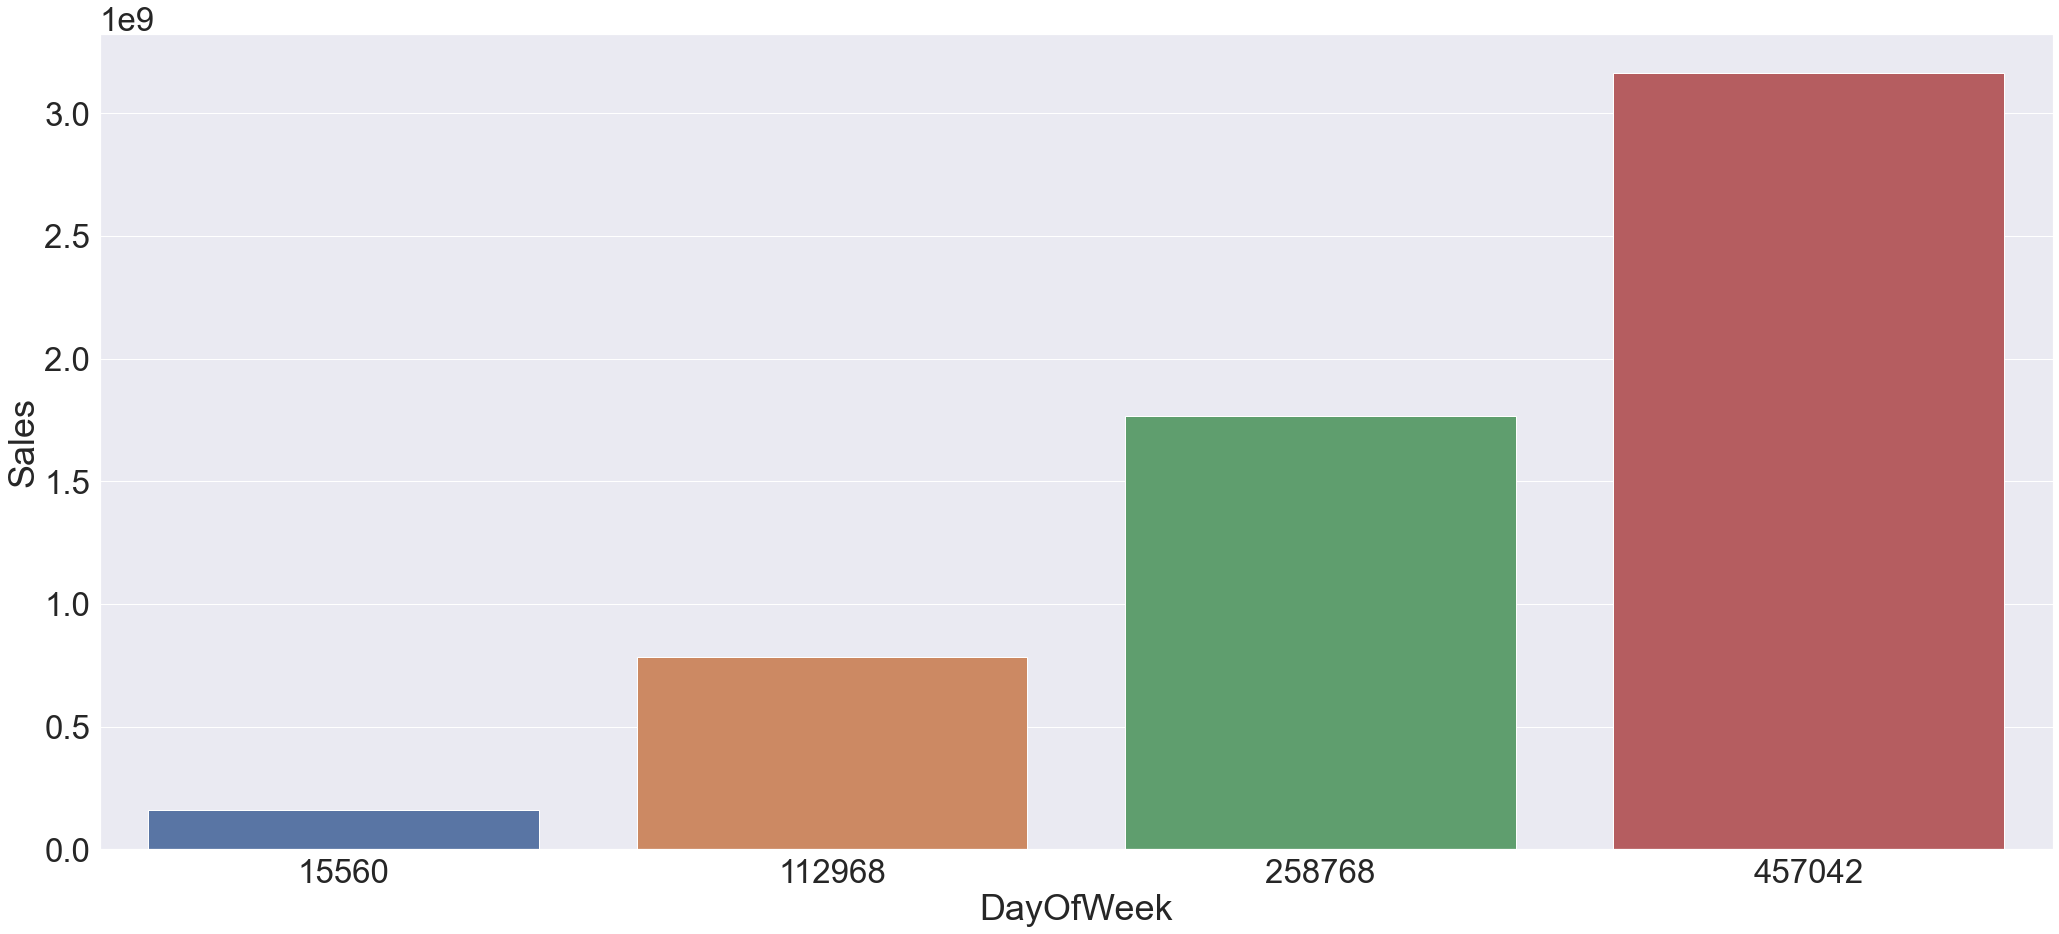

In [186]:
plt.figure(figsize=(35,15))
sns.barplot(x="DayOfWeek", y="Sales", data=weekday_data1)

# 6. Check how the assortment type affects sales


In [187]:
# extractng Assortment data to be used for this analysis
assort_data = train_store[['Assortment','Sales']]

In [188]:
assort_data.nunique()

Assortment        3
Sales         21733
dtype: int64

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

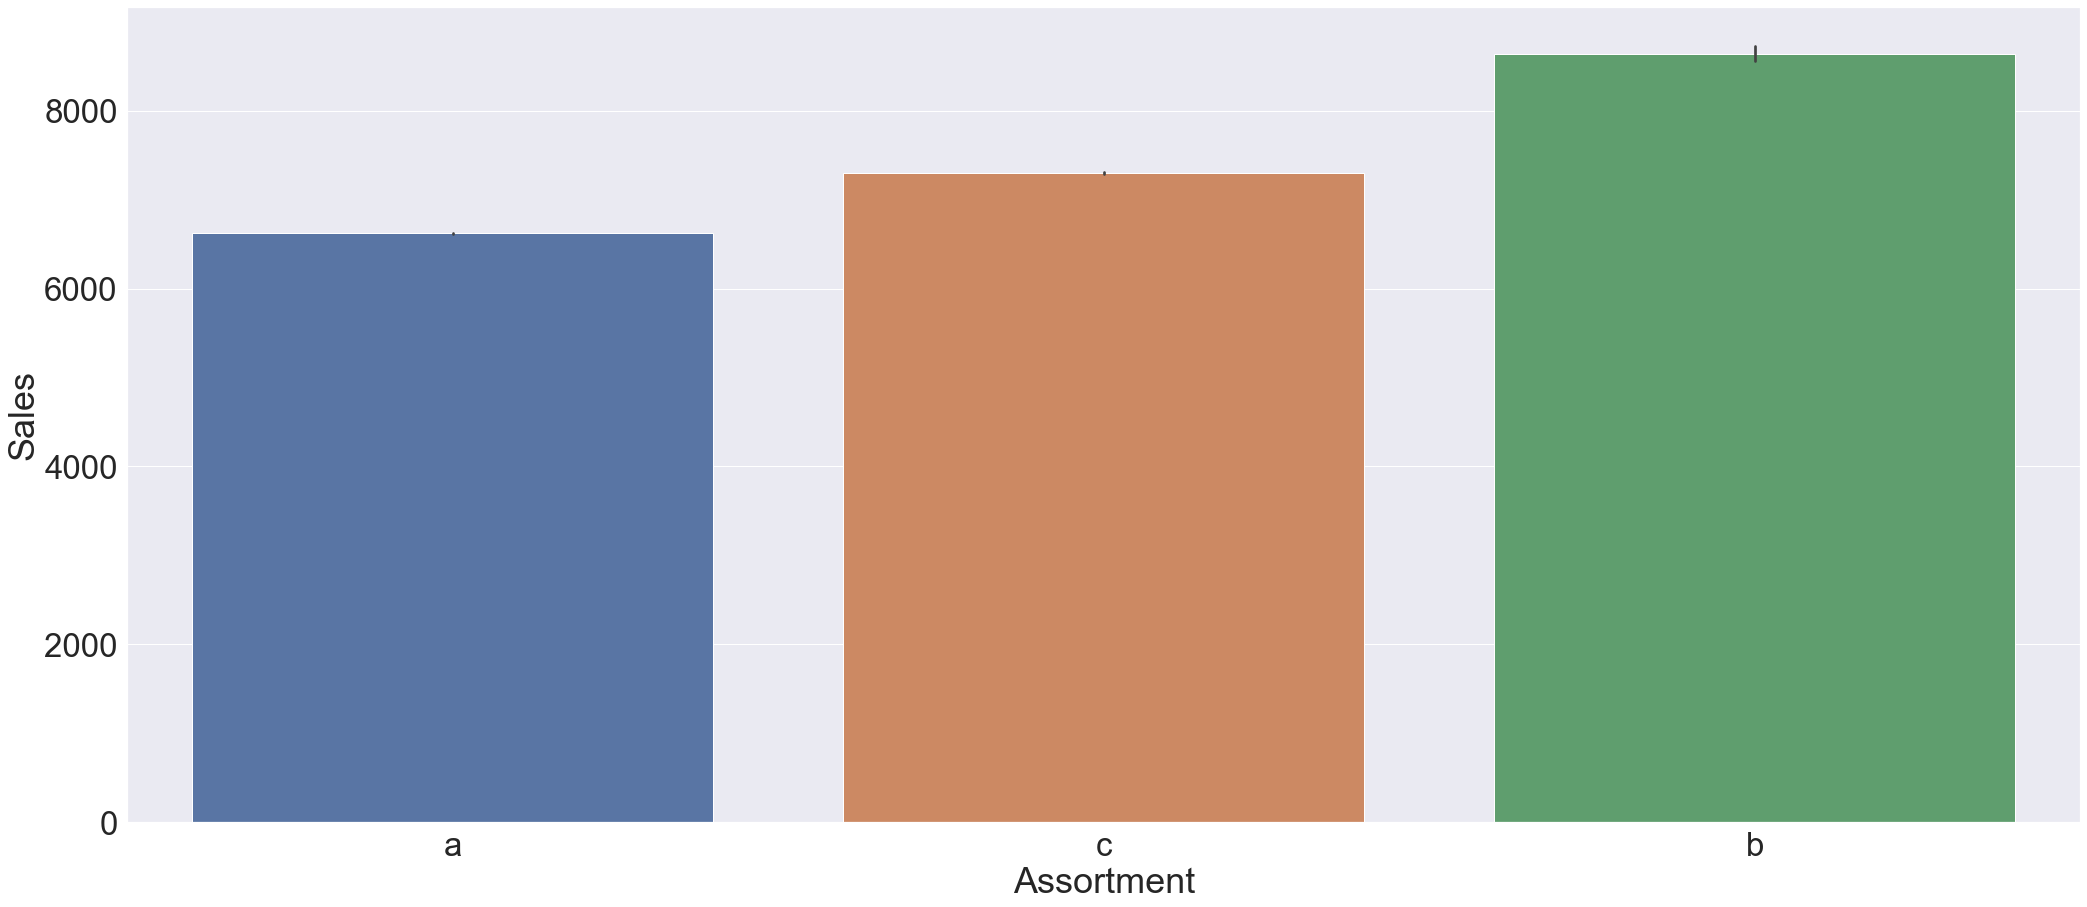

In [189]:
# visulazing the above data we use bar plot this Assortment is categorical
plt.figure(figsize=(35,15))
sns.barplot(x="Assortment", y="Sales", data=assort_data)

In [116]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,o,1,2015,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,o,1,2015,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,o,1,2015,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,o,1,2015,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,o,1,2015,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### 7. How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [190]:
distance_data = train_store[['CompetitionDistance','Sales']]
distance_data = distance_data.groupby(['CompetitionDistance']).agg({"Sales":"sum"})
distance_data.max()

Sales    76259307
dtype: int64

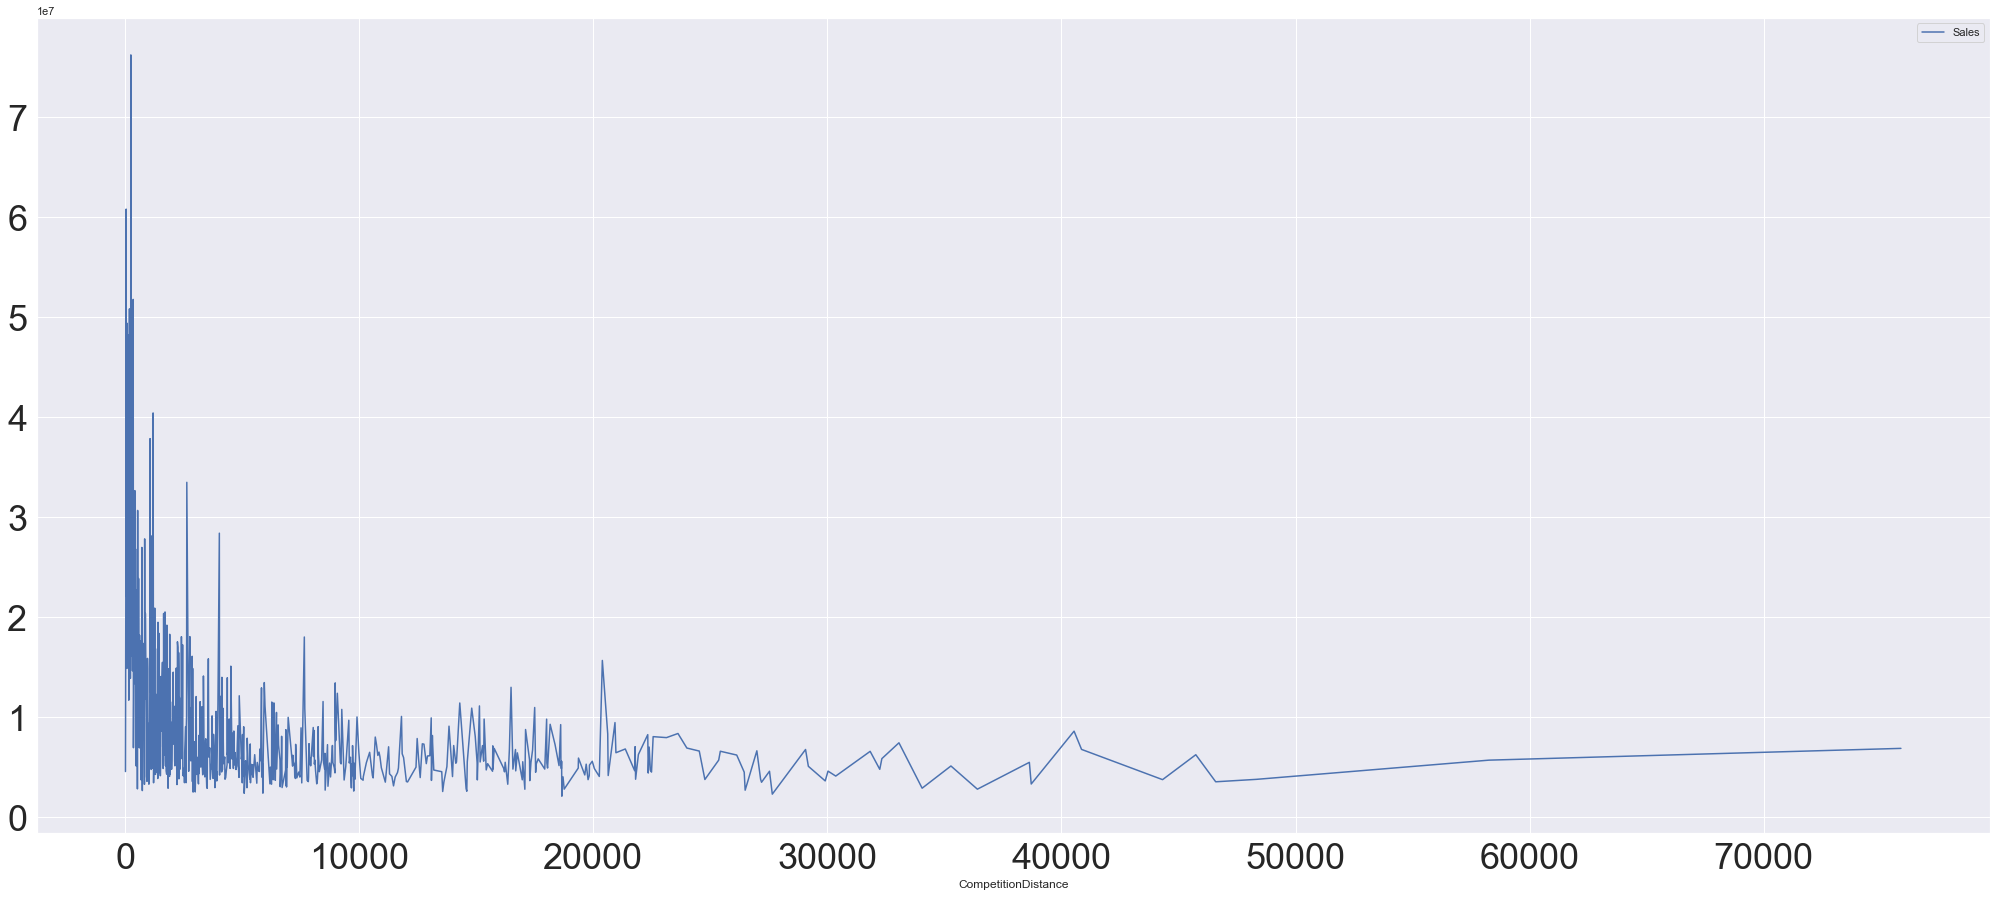

In [191]:
sns.set(font_scale=1)  

distance_data.plot(figsize=(35,15), fontsize=36)
plt.show()

**Note**the less the competition distance the more the sales and as the competion distance increases the sales decreases.

### 8. How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance